# Analisi Funzionale degli ERP

In [1]:
import numpy as np
import os
import pandas as pd
import skfda
import matplotlib.pyplot as plt
from skfda.exploratory.visualization import Boxplot
from skfda.inference.anova import oneway_anova

In [2]:
home_path = os.path.abspath(os.getcwd())

#definizione della basis e lambda
basis = skfda.representation.basis.BSpline(n_basis=18)
smoother=skfda.preprocessing.smoothing.BasisSmoother(basis, smoothing_parameter=1e-5)

# Animali

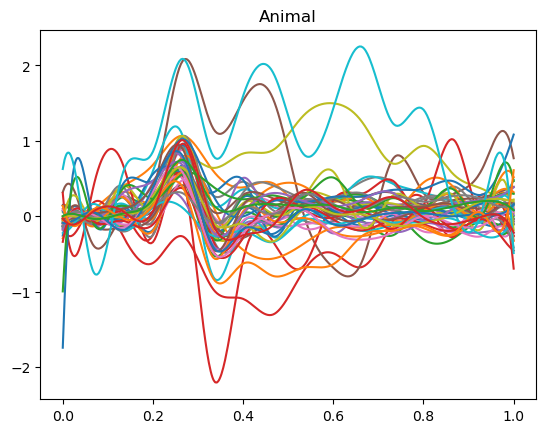

In [3]:
df=pd.read_csv(home_path + '\\analysis\\animal_avg_occipital.csv')
data=df.iloc[:,3:]
datagrid=skfda.FDataGrid(data_matrix=data.T)
animal_basis = smoother.fit_transform(datagrid)
fig=animal_basis.plot()
plt.title('Animal')
plt.show()

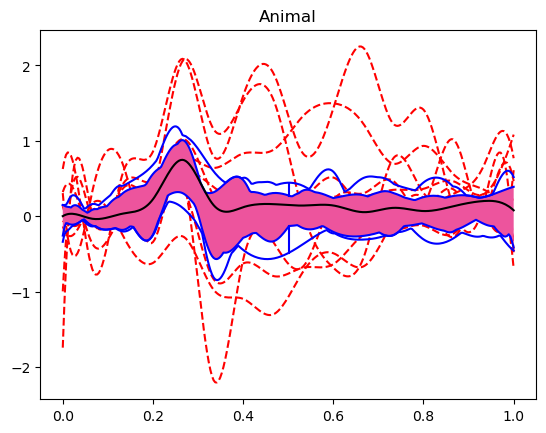

In [4]:
fdBoxplot = Boxplot(animal_basis.to_grid())
fdBoxplot.show_full_outliers = True
fig=fdBoxplot.plot()
plt.title('Animal')
plt.show()

non_outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if not b]
animal=animal_basis[non_outliers]
outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if b]

# Body Parts

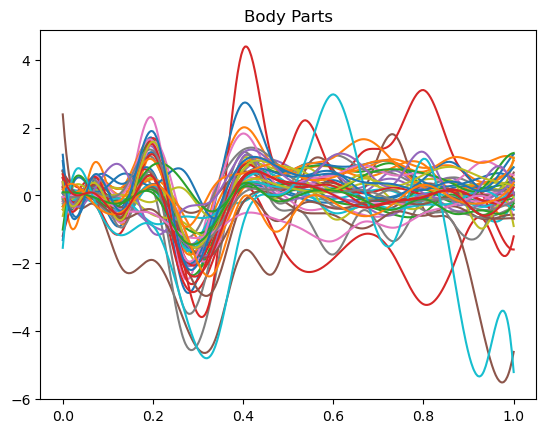

In [5]:
df=pd.read_csv(home_path + '\\analysis\\body_avg_occipital.csv')
data=df.iloc[:,3:]
datagrid=skfda.FDataGrid(data_matrix=data.T)
body_basis = smoother.fit_transform(datagrid)
fig=body_basis.plot()
plt.title('Body Parts')
plt.show()

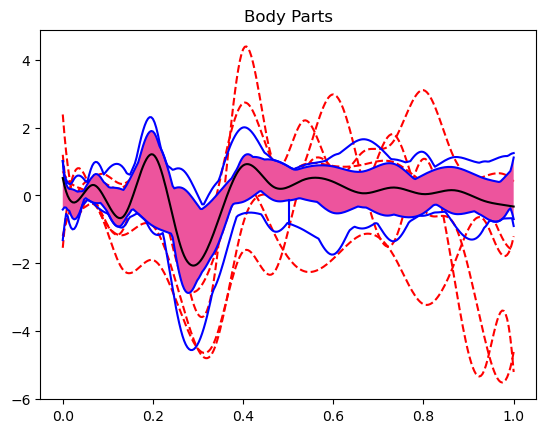

In [6]:
fdBoxplot = Boxplot(body_basis.to_grid())
fdBoxplot.show_full_outliers = True
fig=fdBoxplot.plot()
plt.title('Body Parts')
plt.show()

non_outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if not b]
body=body_basis[non_outliers]
outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if b]

# Vehicles

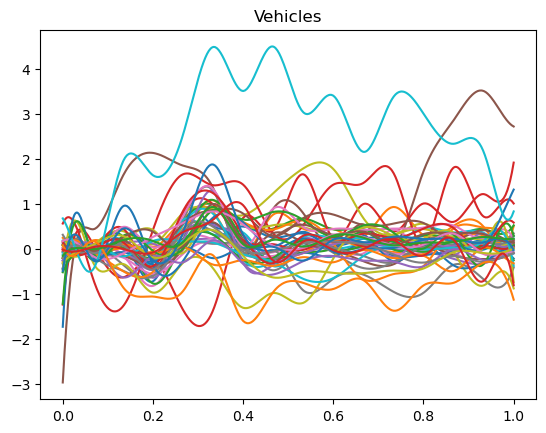

In [7]:
df=pd.read_csv(home_path + '\\analysis\\vehicle_avg_occipital.csv')
data=df.iloc[:,3:]
datagrid=skfda.FDataGrid(data_matrix=data.T)
vehicle_basis = smoother.fit_transform(datagrid)
fig=vehicle_basis.plot()
plt.title('Vehicles')
plt.show()

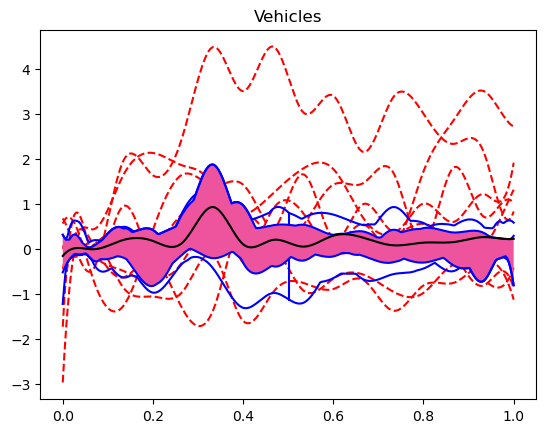

In [8]:
fdBoxplot = Boxplot(vehicle_basis.to_grid())
fdBoxplot.show_full_outliers = True
fig=fdBoxplot.plot()
plt.title('Vehicles')
plt.show()

non_outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if not b]
vehicle=vehicle_basis[non_outliers]
outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if b]

# Tools

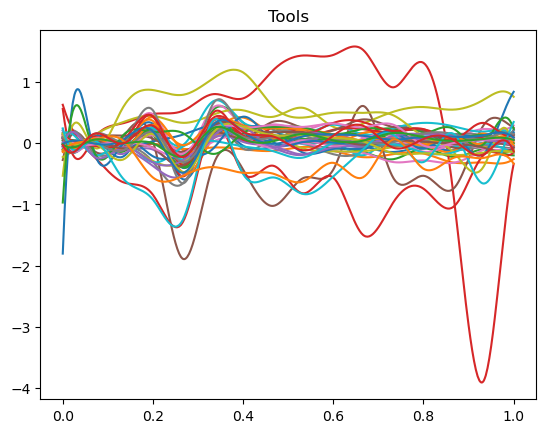

In [9]:
df=pd.read_csv(home_path + '\\analysis\\tool_avg_occipital.csv')
data=df.iloc[:,3:]
datagrid=skfda.FDataGrid(data_matrix=data.T)
tool_basis = smoother.fit_transform(datagrid)
fig=tool_basis.plot()
plt.title('Tools')
plt.show()

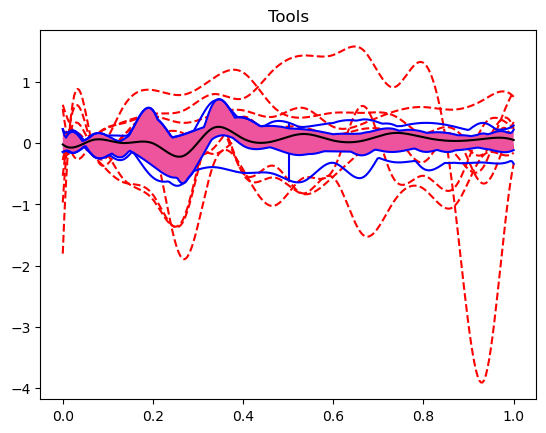

In [10]:
fdBoxplot = Boxplot(tool_basis.to_grid())
fdBoxplot.show_full_outliers = True
fig=fdBoxplot.plot()
plt.title('Tools')
plt.show()

non_outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if not b]
tool=tool_basis[non_outliers]
outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if b]

# Food

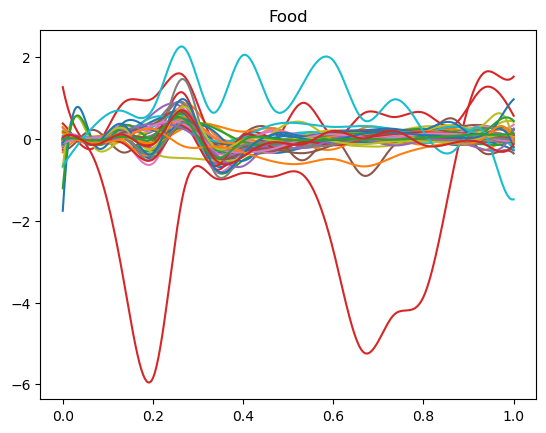

In [11]:
df=pd.read_csv(home_path + '\\analysis\\food_avg_occipital.csv')
data=df.iloc[:,3:]
datagrid=skfda.FDataGrid(data_matrix=data.T)
food_basis = smoother.fit_transform(datagrid)
fig=food_basis.plot()
plt.title('Food')
plt.show()

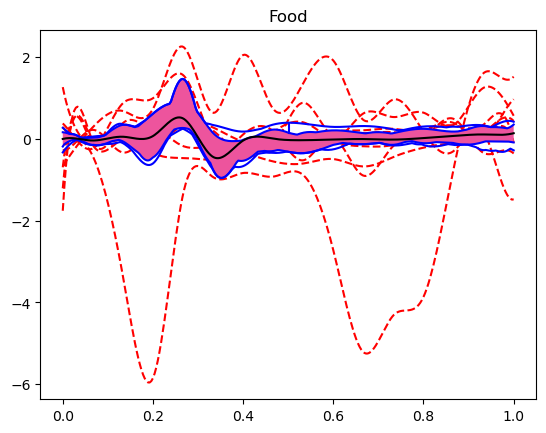

In [12]:
fdBoxplot = Boxplot(food_basis.to_grid())
fdBoxplot.show_full_outliers = True
fig=fdBoxplot.plot()
plt.title('Food')
plt.show()

non_outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if not b]
food=food_basis[non_outliers]
outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if b]

# Functional ANOVA

In [13]:
v_n, p = oneway_anova(animal, body, vehicle, tool, food)

In [14]:
p

0.0